In [1]:
#Part-1: Pre-Processing
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
print(dataset.shape)
dataset.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# drop unnecessary columns
data = dataset.drop(['Surname','Geography','Gender'],axis=1)
print(data.shape)
data.head()

(10000, 11)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x = data.iloc[:,:10]
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10


In [5]:
y = data.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
# split dataset into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
print(x_train)
x_test = scaler.transform(x_test)

[[ 0.01740671  0.16491055 -0.87482909 ...  0.64784127  0.97311137
  -0.36653816]
 [ 0.93830261 -0.17868782  1.09890798 ...  0.64784127 -1.02763161
  -0.9916577 ]
 [-0.2201879  -0.1450604  -1.65393582 ... -1.54358798  0.97311137
  -0.49354169]
 ...
 [-0.60554208 -0.84803348  2.06500033 ...  0.64784127 -1.02763161
   1.45892402]
 [-1.30410492  1.26992269  0.84959382 ...  0.64784127 -1.02763161
   1.46018274]
 [-0.03878355 -0.16803565  0.93269854 ...  0.64784127  0.97311137
   1.57245517]]


In [7]:
#Part-2: ANN Model Construction

import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout

# initialize ANN
classifier = Sequential()

# input layer & first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=10))

# second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# activation function -> output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

# fit ANN to the Training set
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

# list all the data in history
print(model_history.history.keys())

d:\Softwares\python_3.11.1\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
536/536 [==============================] - 6s 5ms/step - loss: 0.6458 - accuracy: 0.6817 - val_loss: 0.5834 - val_accuracy: 0.7842
Epoch 2/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5448 - accuracy: 0.7985 - val_loss: 0.5414 - val_accuracy: 0.7902
Epoch 3/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5176 - accuracy: 0.7987 - val_loss: 0.5224 - val_accuracy: 0.7902
Epoch 4/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5011 - accuracy: 0.7987 - val_loss: 0.5087 - val_accuracy: 0.7902
Epoch 5/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4888 - accuracy: 0.7985 - val_loss: 0.4976 - val_accuracy: 0.7906
Epoch 6/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4791 - accuracy: 0.7990 - val_loss: 0.4879 - val_accuracy: 0.7902
Epoch 7/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4707 - accuracy: 0.7998 - val_loss: 0.4798 - val_accuracy: 0.7921
Epoch 

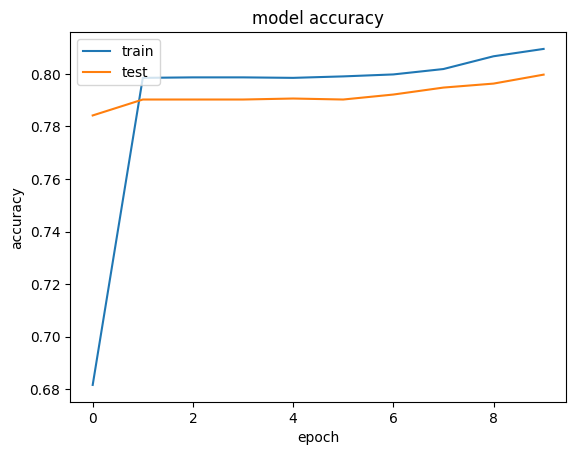

In [9]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

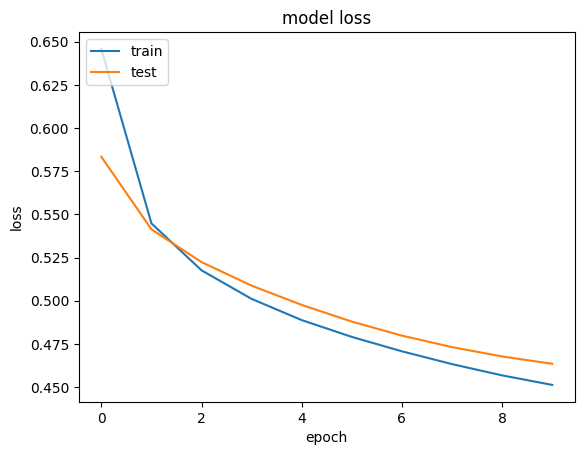

In [10]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#Part-3 : Making the predictions and evaluating the model
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [12]:
# make confuction matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1582   14]
 [ 352   52]]


In [13]:
# calculate the Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.817


In [14]:
print(classifier.predict(scaler.transform([[ 600, 40, 3, 60000, 2, 1, 1, 50000, 0, 1]])) > 0.5)

d:\Softwares\python_3.11.1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
[[False]]
